# Decision Tree Classifier

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix

In [461]:
with open("spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam'])

data_array=data_set.values

In [462]:
data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [463]:
# No of rows in dataset before preprocessing
print(len(data_set))

4601


### Finding the duplicates in the dataset

In [464]:
data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

### Dropping the duplicate values

In [465]:
data_set.drop_duplicates(inplace=True)

In [466]:
print("No of rows in dataset after removing duplicates : ", len(data_set))

No of rows in dataset after removing duplicates :  4210


<Figure size 10000x5000 with 0 Axes>

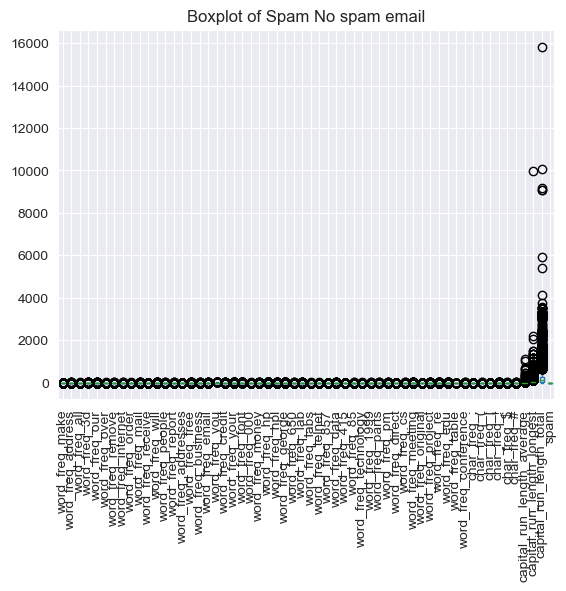

In [467]:
fig = plt.figure(figsize =(100, 50))
data_set.plot.box(title='Boxplot of Spam No spam email',rot=90)

plt.show()

### Boxplot of capital_run_length_total with outliers

<AxesSubplot:xlabel='capital_run_length_total'>

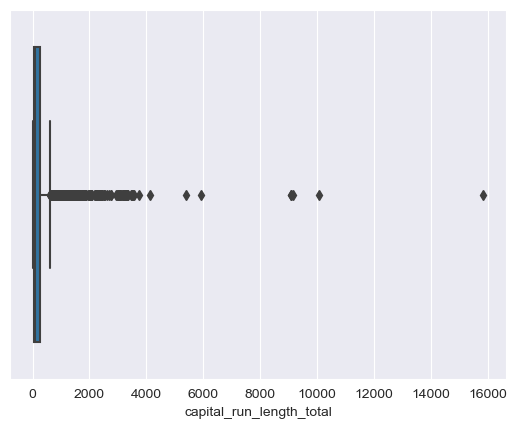

In [468]:
sns.boxplot(x = data_set['capital_run_length_total'])

### Boxplot of capital_run_length_longest with outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

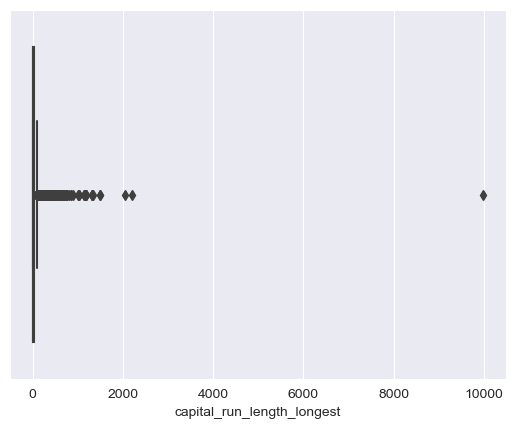

In [469]:
sns.boxplot(x = data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_average with outliers

<AxesSubplot:xlabel='capital_run_length_average'>

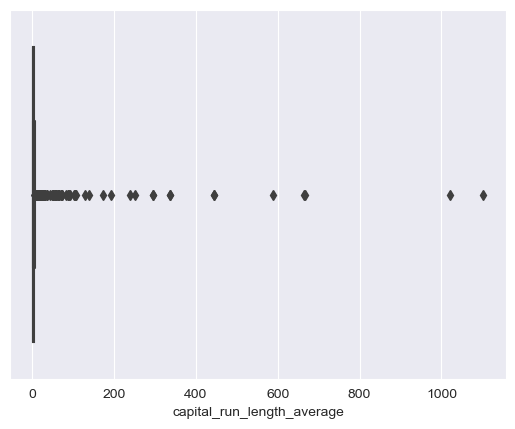

In [470]:
sns.boxplot(x = data_set['capital_run_length_average'])

### Removing outliers from IQR technique

In [471]:
for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(data_set.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_set.loc[data_set[x] < min,x] = np.nan
    data_set.loc[data_set[x] > max,x] = np.nan

### Boxplot of capital_run_length_total without outliers

<AxesSubplot:xlabel='capital_run_length_total'>

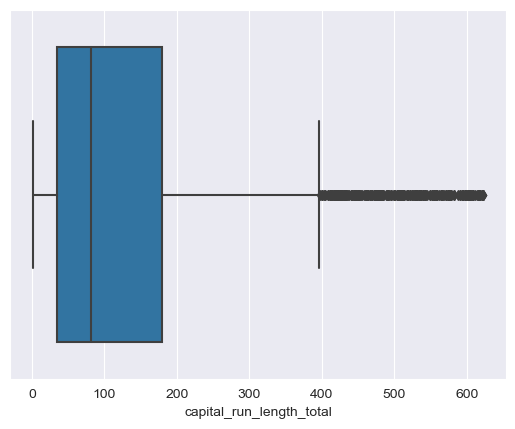

In [472]:
sns.boxplot(x = data_set['capital_run_length_total'])

sns.boxplot(x = data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_longest without outliers

<AxesSubplot:xlabel='capital_run_length_longest'>

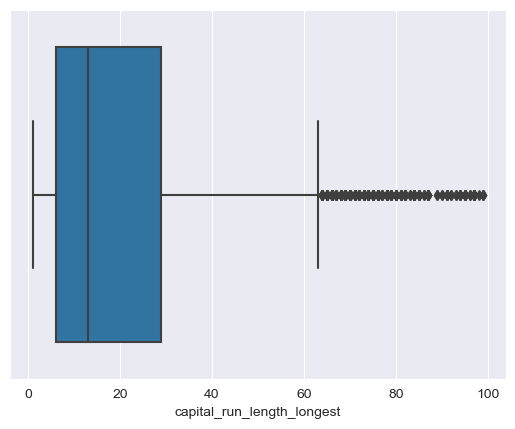

In [473]:
sns.boxplot(x = data_set['capital_run_length_longest'])

### Boxplot of capital_run_length_average without outliers

<AxesSubplot:xlabel='capital_run_length_average'>

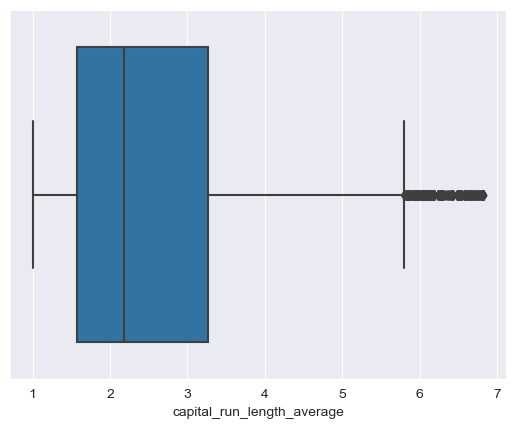

In [474]:
sns.boxplot(x = data_set['capital_run_length_average'])

### Finding the null values in the dataset

In [475]:
data_set.isna().sum().any()

True

In [476]:
data_set.isna().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [477]:
# Drop all rows with NaN values
df_two=data_set.dropna()
df_two=data_set.dropna(axis=0)

# Reset index after drop
df_two=data_set.dropna().reset_index(drop=True)

data_set = df_two
df_two

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


### Removing the target column

In [478]:
data=data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0


In [479]:
# No of rows in dataset after preprocessing
print(len(data_set))

3446


<AxesSubplot:>

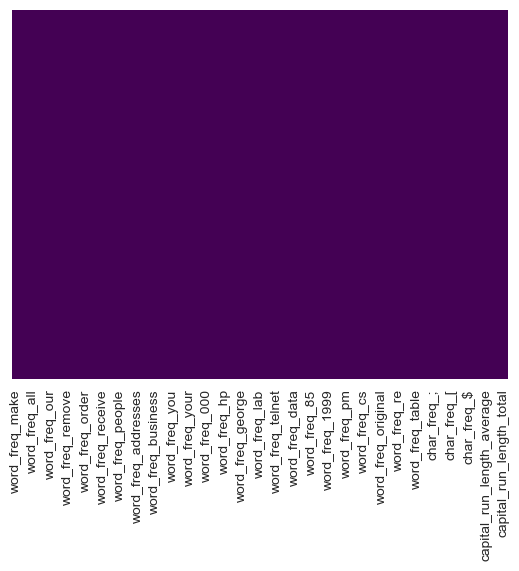

In [480]:
#graphically viewing whether null values available
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Summary of dataset before performing Standard Scaler

In [481]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


### Performing Standard Scaling for the dataset

In [482]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
df=pd.DataFrame(data=scaled_data, columns= data.columns)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


### Summmary of dataset after performing Standard Scaling

In [483]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,1.906919e-15,-4.400459e-16,6.484785e-16,-5.201674e-16,-4.045146e-15,-1.406014e-15,-1.210717e-14,1.584065e-15,4.067150e-15,-7.056650e-16,...,2.352788e-15,2.911178e-15,1.163286e-15,-1.355787e-15,-9.867405e-16,4.202739e-15,3.410247e-17,8.189747e-17,6.437103e-17,-1.803871e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


# Performing PCA to the Dataset

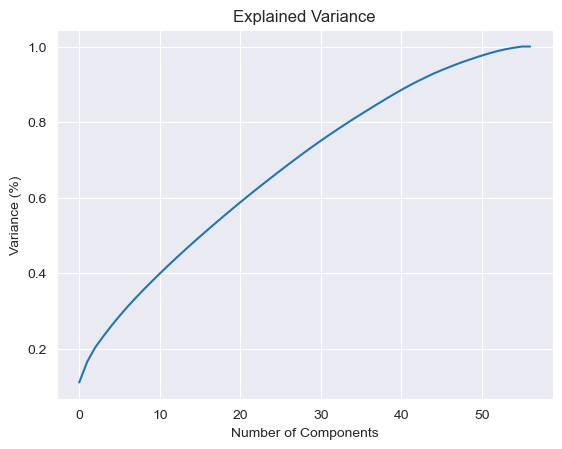

In [484]:
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

### Introducing the PCA components

In [485]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df)

# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

### Dataset after performing PCA

In [486]:
# principal_Df
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-1.006857,1.802156,0.718589,0.075241,-0.217817,-0.058589,-1.193403,-0.852905,1.059779,0.868212,...,-0.126182,0.223657,0.056357,0.544735,-0.015071,0.158219,-0.108653,0.046270,-0.539722,-0.318630
1,-0.985097,1.538500,0.306285,-0.027349,-0.287027,-0.185410,-0.690265,0.207733,-0.356725,-0.197850,...,0.394883,-0.600475,0.334746,0.342832,-0.794102,0.292224,-0.134789,0.075201,0.327509,-0.536917
2,-0.986344,1.538184,0.305695,-0.026639,-0.287306,-0.184839,-0.690876,0.206864,-0.356996,-0.199397,...,0.394632,-0.599379,0.332246,0.345741,-0.795285,0.293561,-0.132490,0.074648,0.326890,-0.536506
3,-0.589457,-0.147100,-0.010563,0.294489,-0.672918,-0.411189,0.165765,0.738283,-1.293434,-0.064255,...,0.348162,-1.152403,1.043491,0.807597,-0.761186,1.206986,0.434177,-0.708441,0.290442,-0.544933
4,-1.147369,0.762934,-1.665244,0.687088,-0.063161,1.574347,-1.343569,-0.179804,-0.196411,-0.557212,...,1.899518,-0.332896,1.357304,-0.603566,0.106004,0.546264,0.396410,1.107192,-0.393822,0.418522


In [487]:
print(pca.explained_variance_)

[6.27759756 3.15144097 2.16980778 1.66017088 1.59211521 1.46548127
 1.40631176 1.31436094 1.26232716 1.22095857 1.20125141 1.16639659
 1.14251355 1.11554969 1.10047185 1.07449388 1.0581399  1.04459241
 1.03537508 1.01614075 1.01281741 0.99035297 0.97889077 0.95874513
 0.94603929 0.94151793 0.92774172 0.910889   0.90401355 0.87348309
 0.86263246 0.83739105 0.81823734 0.80175686 0.79144679 0.76599957
 0.75748219 0.74454555 0.73422725 0.72280828 0.7009683  0.66686829
 0.62738507 0.59415022]


In [488]:
print(pca.components_)

[[-0.0362469  -0.0082901  -0.04087849 ...  0.00769075 -0.04498997
  -0.03785909]
 [ 0.10473608  0.06979255  0.10340069 ...  0.34752076  0.37715474
   0.29949374]
 [-0.08995244 -0.04322311 -0.09566624 ...  0.3190367   0.26997188
   0.31890675]
 ...
 [-0.20794074  0.28824992 -0.04358507 ... -0.11654151 -0.04524336
   0.12753343]
 [-0.0294411   0.26661848  0.03174086 ... -0.00968321  0.01767047
   0.00265793]
 [-0.01442765  0.00555853  0.07462141 ... -0.03023329 -0.02642786
  -0.01076878]]


## Build the predictive model by appling Decision Tree (DT) algorithm

In [489]:
X = principal_Df.iloc[:,0:44].values
y = data_set.iloc[:, 57].values

### Splitting the dataset into the Training set and Test set

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Fitting classifier to the Training set

In [491]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Accuracy of testing dataset

In [492]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8724637681159421

### Checking accuracy of training dataset


In [493]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9992743105950653

In [494]:
#Generating the classification report for the Decision Tree modal
print('Classification Report : ')
print(classification_report(y_test, predictions_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       450
           1       0.85      0.78      0.81       240

    accuracy                           0.87       690
   macro avg       0.87      0.85      0.86       690
weighted avg       0.87      0.87      0.87       690



### Visualizing our final decision tree


Text(115.9222222222222, 0.5, 'predicted class')

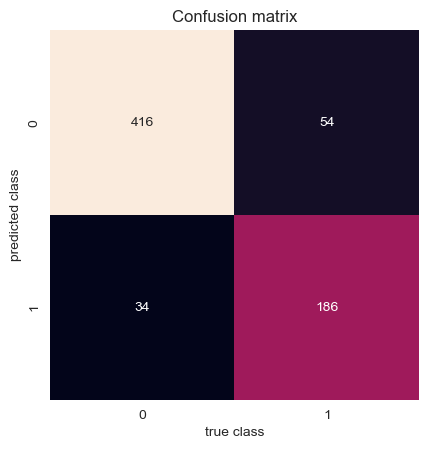

In [495]:
# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, predictions_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

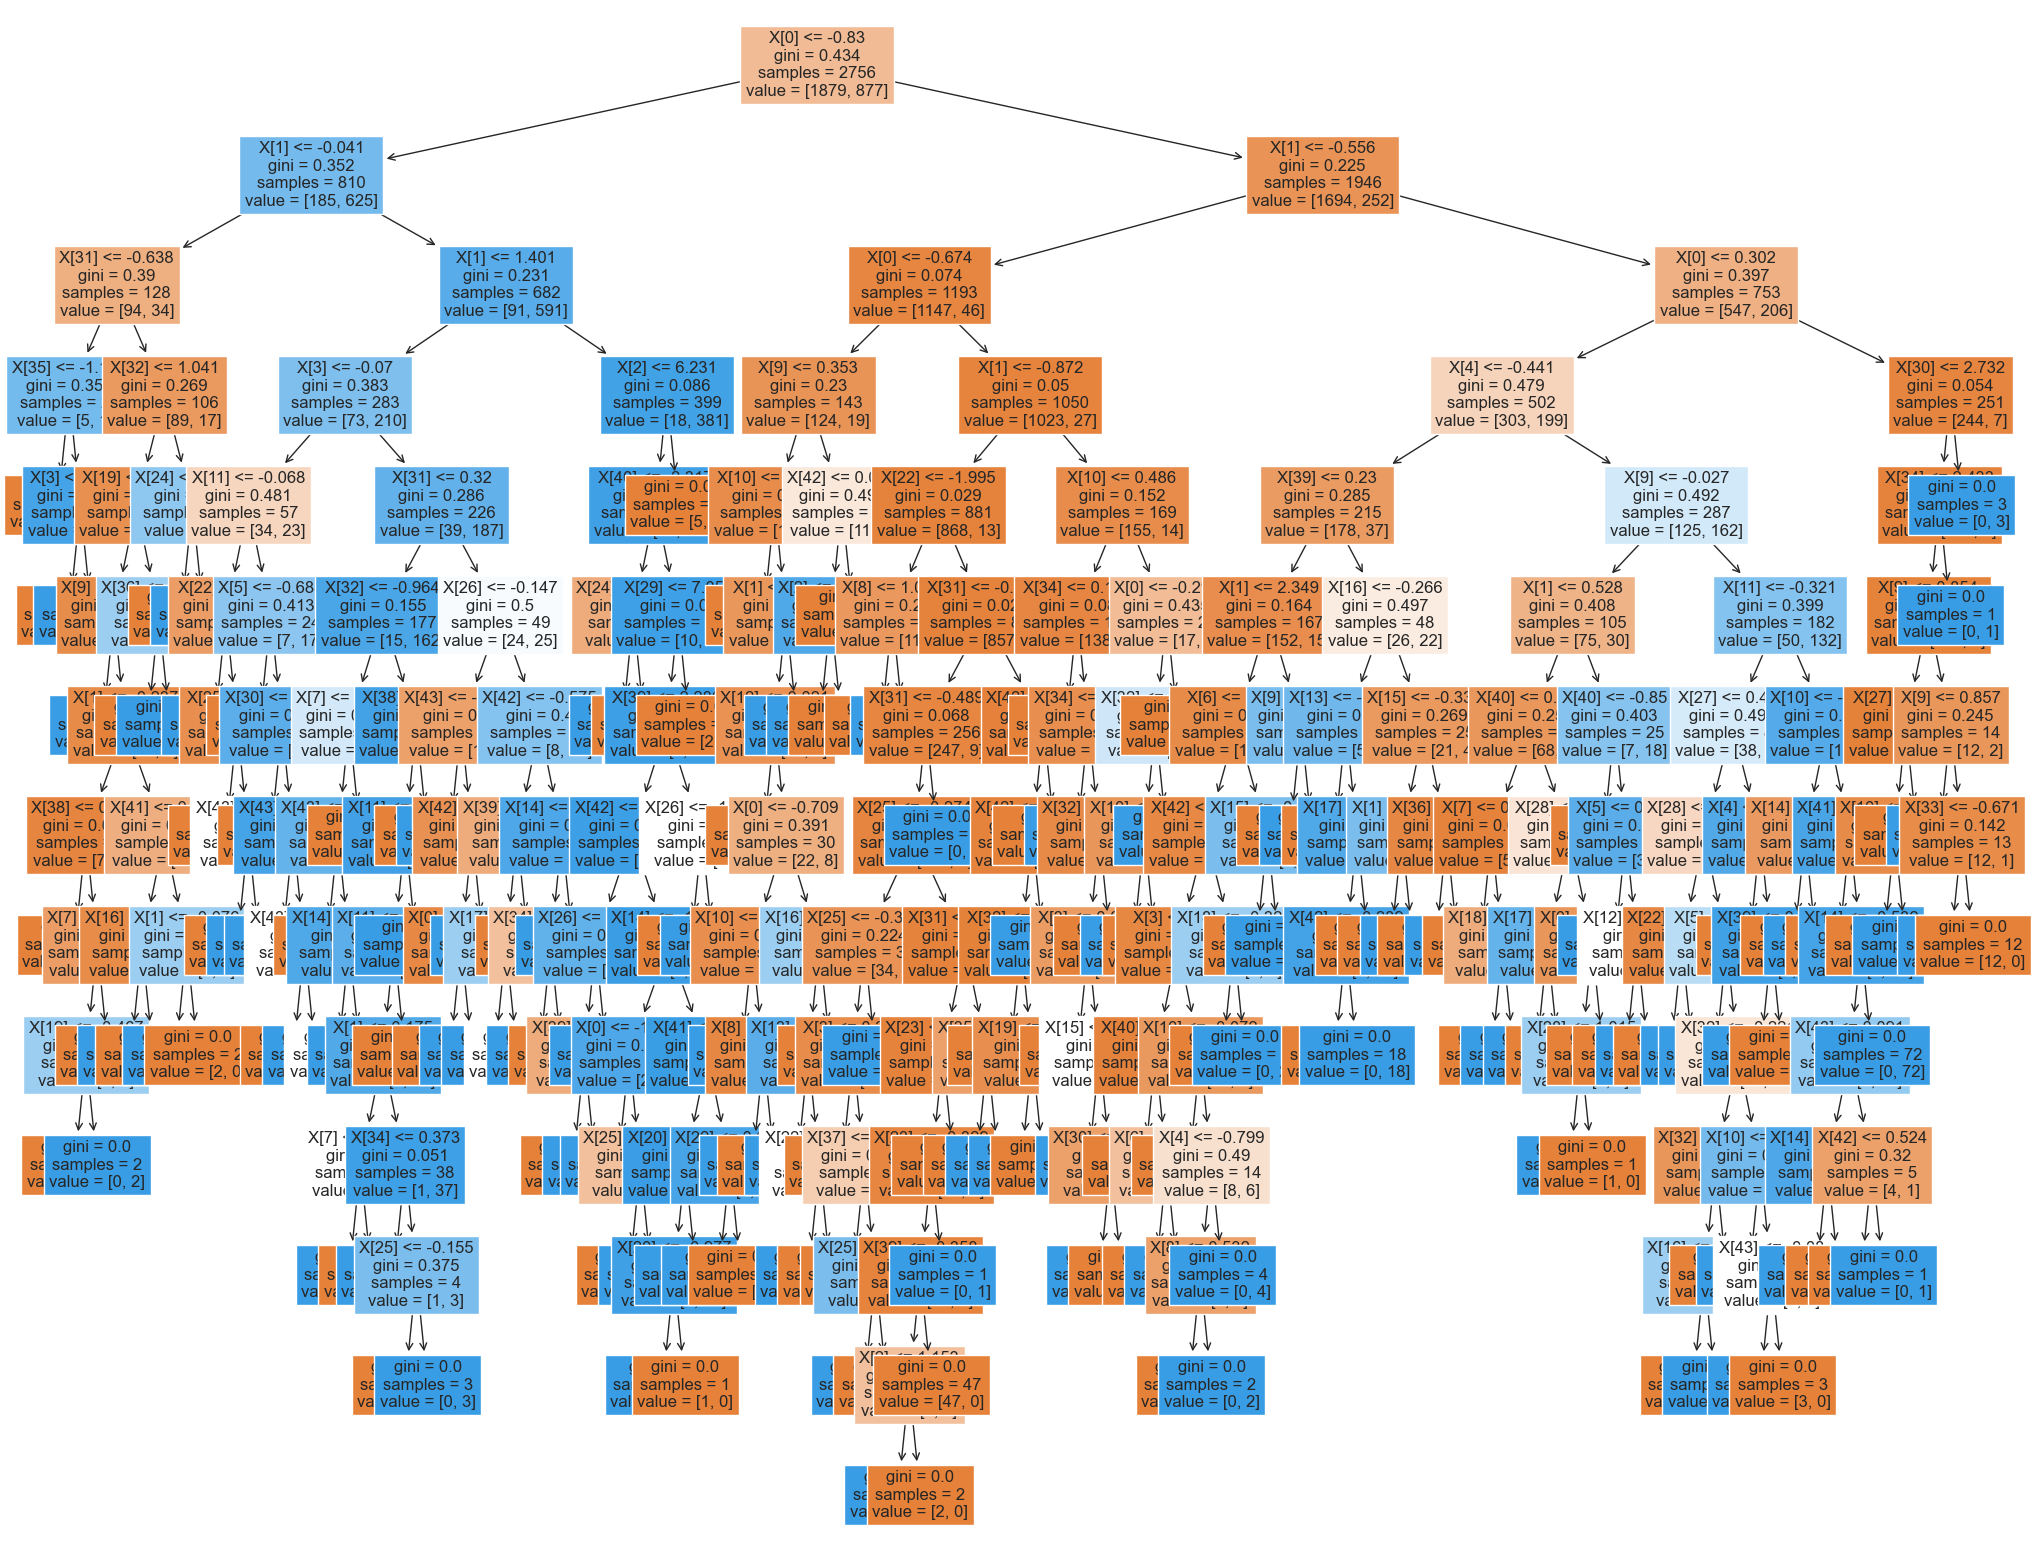

In [496]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True,
              fontsize=12)
plt.show()

### Plotting ROC curve for our Decision Tree

In [497]:
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.8494722222222223

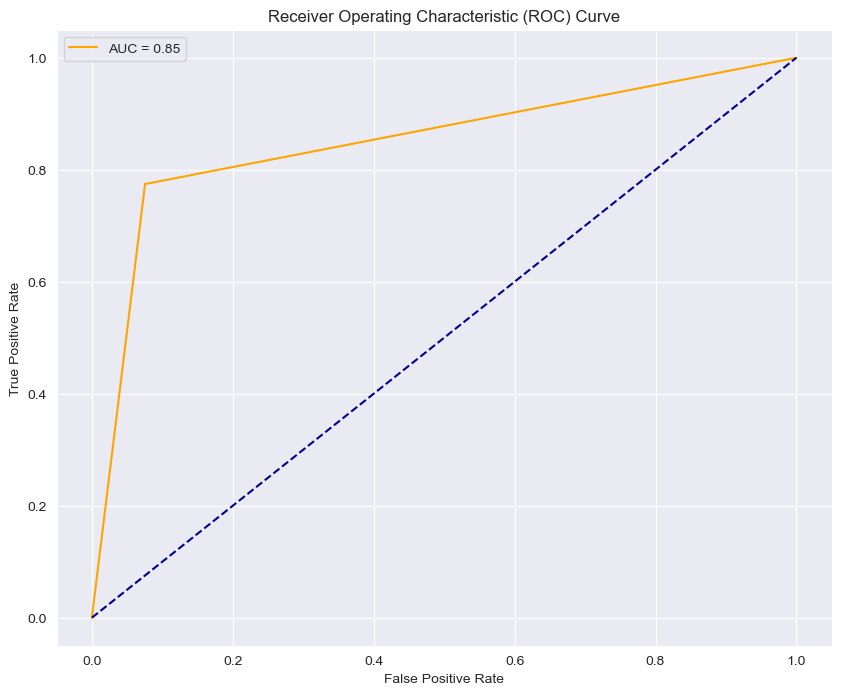

In [498]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt,tpr_dt)

### pruning the decision tree

In [499]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

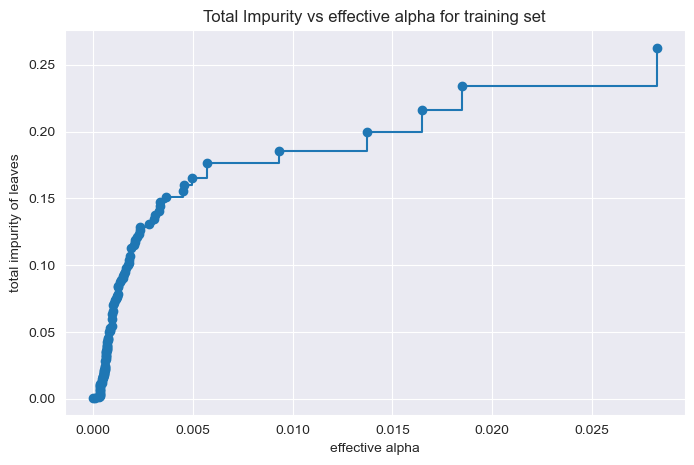

In [500]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [501]:
clf = DecisionTreeClassifier(random_state = 101, ccp_alpha=0.003)
clf = clf.fit(X_train, y_train)

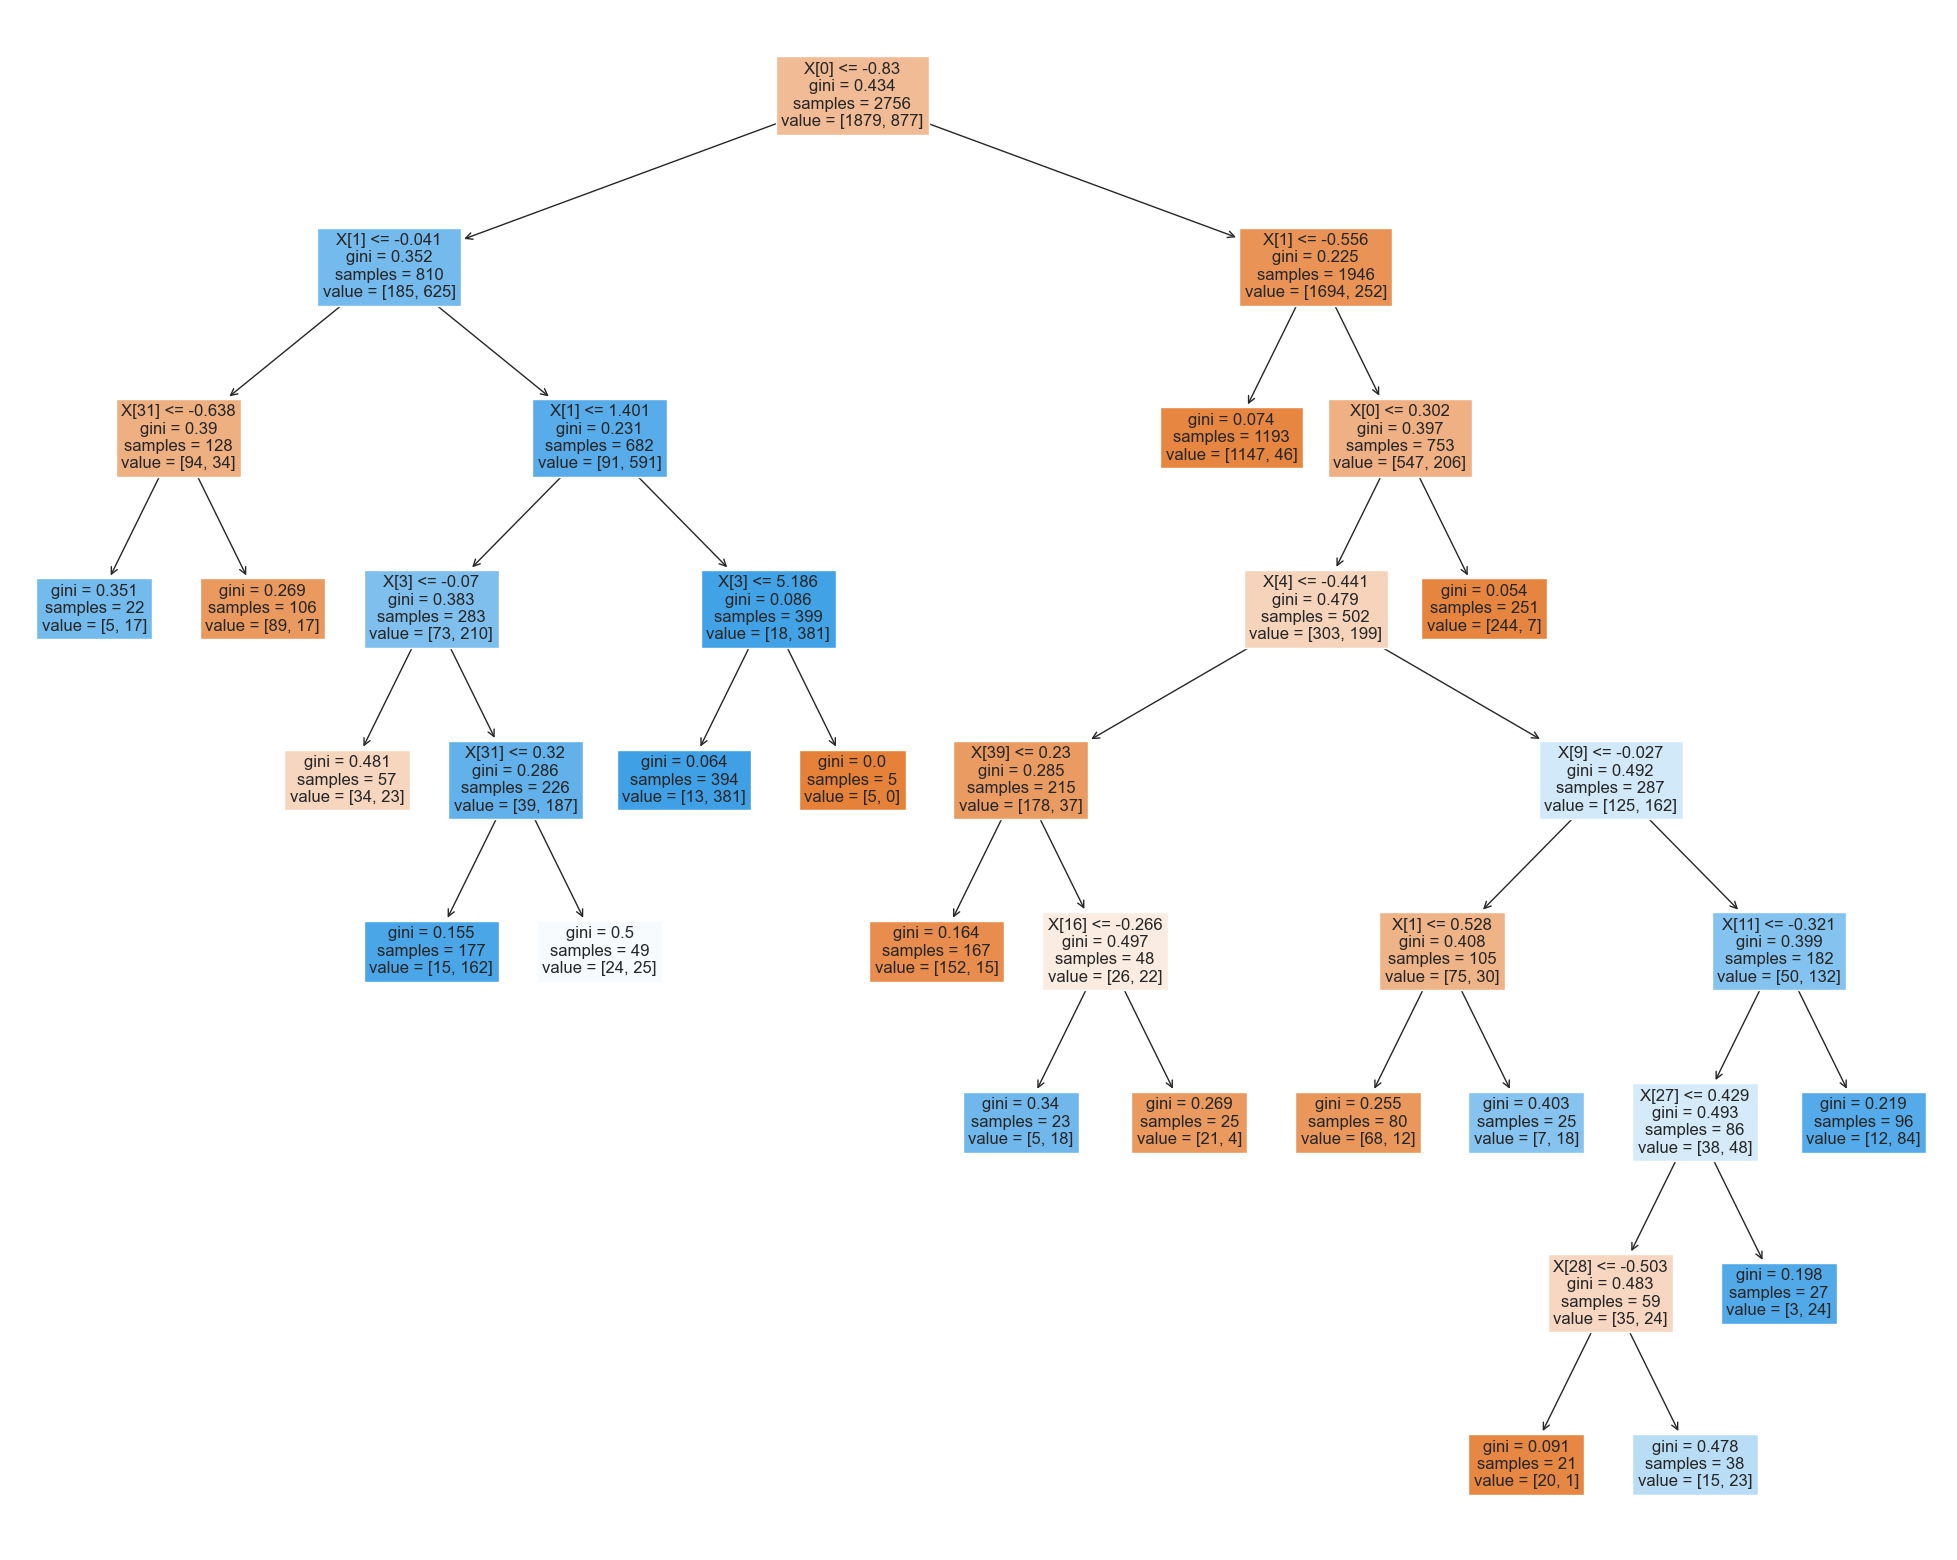

In [502]:
#visualizing the decision tree after pruning
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True,
              fontsize=12)
plt.show()

### Accuracy of the training and testing datasets after pruning

In [503]:
#accuracy of training dataset after pruning
predtr=clf.predict(X_train)
accuracy_score(y_train, predtr)*100

91.8722786647315

In [504]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)*100

87.97101449275362

Text(115.9222222222222, 0.5, 'predicted class')

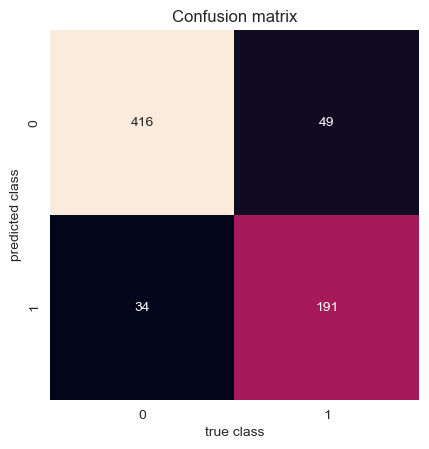

In [505]:
# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, predictions_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')